In [ ]:
import sys
import pandas as pd, numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import plotly
import dash

print("Python:", sys.version.splitlines()[0])
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)
print("scipy:", scipy.__version__)
print("plotly:", plotly.__version__)
print("dash:", dash.__version__)

Python: 3.11.14 | packaged by conda-forge | (main, Oct 22 2025, 22:35:28) [MSC v.1944 64 bit (AMD64)]
pandas: 2.3.3
numpy: 2.3.4
matplotlib: 3.10.8
seaborn: 0.13.2
scipy: 1.16.3
plotly: 6.4.0
dash: 3.2.0


In [ ]:
import os

In [ ]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os  # ✅ added to work with file system

In [6]:
# Notebook cell: list CSV files in current folder
import os, glob, pathlib
cwd = pathlib.Path.cwd()
print("Current working directory:", cwd)
csvs = list(cwd.glob("*.csv"))
print(f"Found {len(csvs)} csv file(s) in this folder:")
for f in csvs:
    print(" -", f.name)
# also print top-level filenames for quick glance
print("\nTop-level items:")
for p in cwd.iterdir():
    print(" ", p.name)

Current working directory: c:\Users\Biswajit\citi-bike-nyc-2022-dashboard
Found 0 csv file(s) in this folder:

Top-level items:
  .git
  .gitignore
  citi_bike_analysis_1.ipynb
  data
  matplotlib_test.ipynb
  New Notebook.ipynb
  README.md
  requirements.txt
  Task_PM_2.2 - Dashboard Plan.docx
  venv


In [7]:
# Cell A1: find the merged file in the data/processed folder and load it
import pathlib, os
proj = pathlib.Path(r"C:\Users\Biswajit\citi-bike-nyc-2022-dashboard")
data_dir = proj / "data" / "processed"

print("Project folder:", proj)
print("Checking data folder:", data_dir)
if not data_dir.exists():
    raise FileNotFoundError(f"Data folder not found: {data_dir}")

# try to find a file that starts with the base name you gave
candidates = list(data_dir.glob("citibike_with_weather_merged*"))
print(f"Found {len(candidates)} candidate(s):")
for f in candidates:
    print(" -", f.name)

# if found, choose the first candidate; otherwise raise error with suggestions
if not candidates:
    raise FileNotFoundError("No file starting with 'citibike_with_weather_merged' found in data/processed. "
                            "Check filename or move the file into this folder.")
fn = candidates[0]   # full path object
print("Using file:", fn)

# load with pandas (do not assume date parsing column name yet)
import pandas as pd
df = pd.read_csv(fn)   # we'll parse date after inspecting column names
print("Loaded. Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Project folder: C:\Users\Biswajit\citi-bike-nyc-2022-dashboard
Checking data folder: C:\Users\Biswajit\citi-bike-nyc-2022-dashboard\data\processed
Found 1 candidate(s):
 - citibike_with_weather_merged.csv
Using file: C:\Users\Biswajit\citi-bike-nyc-2022-dashboard\data\processed\citibike_with_weather_merged.csv


C:\Users\Biswajit\AppData\Local\Temp\ipykernel_21116\248512801.py:26: DtypeWarning: Columns (16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fn)   # we'll parse date after inspecting column names


Loaded. Shape: (895485, 20)
Columns: ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', '_start_dt', 'date', 'value', 'datatype', 'station', 'attributes', '_merge']


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,_start_dt,date,value,datatype,station,attributes,_merge
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26 18:50:39,2022-01-26,1171.016667,ADPT,GHCND:USW00014732,",,W,",both
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28 13:14:07,2022-01-28,1030.570000,ADPT,GHCND:USW00014732,",,W,",both
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10 19:55:13,2022-01-10,1168.655556,ADPT,GHCND:USW00014732,",,W,",both
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26 07:54:57,2022-01-26,1171.016667,ADPT,GHCND:USW00014732,",,W,",both
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13 18:44:46,2022-01-13,1145.411111,ADPT,GHCND:USW00014732,",,W,",both


In [8]:
# Cell B1: Inspect key columns and sample values
# Print sample values for likely columns
cols = df.columns.tolist()
print("Total columns:", len(cols))
# heuristics to find likely names
candidates = {
    "date": [c for c in cols if "date" in c.lower()],
    "temp": [c for c in cols if any(x in c.lower() for x in ("temp","temperature","avgtemp"))],
    "tripid": [c for c in cols if "trip" in c.lower() and ("id" in c.lower() or "tripduration" not in c.lower())],
    "tripduration": [c for c in cols if "duration" in c.lower()],
    "usertype": [c for c in cols if "usertype" in c.lower()],
    "gender": [c for c in cols if "gender" in c.lower()]
}
for k,v in candidates.items():
    print(f"{k} candidates ->", v)
# show top rows for manual verification
df.head(3)

Total columns: 20
date candidates -> ['date']
temp candidates -> []
tripid candidates -> []
tripduration candidates -> []
usertype candidates -> []
gender candidates -> []


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,_start_dt,date,value,datatype,station,attributes,_merge
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26 18:50:39,2022-01-26,1171.016667,ADPT,GHCND:USW00014732,",,W,",both
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28 13:14:07,2022-01-28,1030.570000,ADPT,GHCND:USW00014732,",,W,",both
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10 19:55:13,2022-01-10,1168.655556,ADPT,GHCND:USW00014732,",,W,",both


In [10]:
# Cell C1: standardize column names and parse date
# Use detected names where possible
col_map = {}  # optional map if you want to rename: {'oldname':'date'}
# Find the actual date column
date_col = None
for c in df.columns:
    if 'date' == c.lower() or 'date' in c.lower():
        date_col = c
        break
if date_col is None:
    raise KeyError("No 'date' column found — please check column names printed earlier.")

# parse date
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
print("Date column after parsing: nulls:", df[date_col].isna().sum())

# set index
df = df.sort_values(date_col).reset_index(drop=True)
df = df.set_index(date_col).sort_index()

# create 2022 subset (if data exists)
if '2022' in str(df.index.min()) or '2022' in str(df.index.max()):
    # more robust: use partial string index
    try:
        df_2022 = df.loc['2022']
    except Exception as e:
        df_2022 = df[(df.index.year == 2022)]
else:
    # fallback: filter by year
    df_2022 = df[df.index.year == 2022]

print("Full df shape:", df.shape, "   df_2022 shape:", df_2022.shape)
df_2022.head()

Date column after parsing: nulls: 0
Full df shape: (895485, 19)    df_2022 shape: (895485, 19)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,_start_dt,value,datatype,station,attributes,_merge
date,,,,,,,,,,,,,,,,,,,
2022-01-01,09517A19F52C8FE4,classic_bike,2022-01-01 14:51:51,2022-01-01 15:24:32,Newport PATH,JC066,Newport PATH,JC066,40.727224,-74.033759,40.727224,-74.033759,casual,2022-01-01 14:51:51,1110.5,ADPT,GHCND:USW00014732,",,W,",both
2022-01-01,C7B485FB3EEC674C,classic_bike,2022-01-01 15:12:06,2022-01-01 15:27:53,Bergen Ave,JC095,Washington St,JC098,40.722104,-74.071455,40.724294,-74.035483,casual,2022-01-01 15:12:06,1110.5,ADPT,GHCND:USW00014732,",,W,",both
2022-01-01,A68C233443AF7685,classic_bike,2022-01-01 20:16:22,2022-01-01 20:22:58,Sip Ave,JC056,Bergen Ave,JC095,40.730897,-74.063913,40.722104,-74.071455,member,2022-01-01 20:16:22,1110.5,ADPT,GHCND:USW00014732,",,W,",both
2022-01-01,F68B9199E986F2CA,classic_bike,2022-01-01 18:57:13,2022-01-01 19:06:56,Newport Pkwy,JC008,Jersey & 3rd,JC074,40.728745,-74.032108,40.723332,-74.045953,member,2022-01-01 18:57:13,1110.5,ADPT,GHCND:USW00014732,",,W,",both
2022-01-01,F599BA9B9A1161ED,classic_bike,2022-01-01 00:24:59,2022-01-01 00:35:17,Columbus Dr at Exchange Pl,JC106,Jersey & 3rd,JC074,40.716870,-74.032810,40.723332,-74.045953,casual,2022-01-01 00:24:59,1110.5,ADPT,GHCND:USW00014732,",,W,",both


In [11]:
# Cell D1: find temperature and trip-count columns (and tripduration, usertype, gender)
cols = df.columns.tolist()
print("Columns:", cols)

# Try to auto-detect temp column
temp_candidates = [c for c in cols if any(x in c.lower() for x in ('temp','temperature','avgtemp'))]
tripcount_candidates = [c for c in cols if any(x in c.lower() for x in ('bike_rides_daily','trip_count','bike_count','trips'))]
tripid_candidates = [c for c in cols if 'trip_id' in c.lower() or 'tripid' in c.lower()]
tripduration_candidates = [c for c in cols if 'duration' in c.lower() or 'tripduration' in c.lower()]
usertype_candidates = [c for c in cols if 'usertype' in c.lower()]
gender_candidates = [c for c in cols if 'gender' in c.lower()]

print("temp:", temp_candidates)
print("trip_count:", tripcount_candidates)
print("trip_id:", tripid_candidates)
print("tripduration:", tripduration_candidates)
print("usertype:", usertype_candidates)
print("gender:", gender_candidates)

# Pick defaults (you can change these names below if needed)
temp_col = temp_candidates[0] if temp_candidates else None
trip_count_col = tripcount_candidates[0] if tripcount_candidates else None
trip_id_col = tripid_candidates[0] if tripid_candidates else None
tripduration_col = tripduration_candidates[0] if tripduration_candidates else None
usertype_col = usertype_candidates[0] if usertype_candidates else None
gender_col = gender_candidates[0] if gender_candidates else None

print("\nUsing names (adjust if wrong):")
print(" temp_col =", temp_col)
print(" trip_count_col =", trip_count_col)
print(" trip_id_col =", trip_id_col)
print(" tripduration_col =", tripduration_col)
print(" usertype_col =", usertype_col)
print(" gender_col =", gender_col)

Columns: ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', '_start_dt', 'value', 'datatype', 'station', 'attributes', '_merge']
temp: []
trip_count: []
trip_id: []
tripduration: []
usertype: []
gender: []

Using names (adjust if wrong):
 temp_col = None
 trip_count_col = None
 trip_id_col = None
 tripduration_col = None
 usertype_col = None
 gender_col = None


In [12]:
# Cell E1: create trip count per day if missing
if trip_count_col is None:
    # We need a unique identifier per trip; try to detect
    if trip_id_col:
        print("Creating bike_rides_daily by grouping trip_id...")
        df_group = df.reset_index().groupby('date')[trip_id_col].count().reset_index(name='bike_rides_daily')
    else:
        # if no trip_id, but each row is a trip, use size()
        print("No trip_id found; aggregating by row count per day...")
        df_group = df.reset_index().groupby('date').size().reset_index(name='bike_rides_daily')
    # merge back into df (outer)
    df_merge = df.reset_index().merge(df_group, on='date', how='left')
    df = df_merge.set_index(pd.to_datetime(df_merge['date'])).sort_index()
    trip_count_col = 'bike_rides_daily'
    df_2022 = df.loc['2022']
    print("Created 'bike_rides_daily'. Sample:")
    display(df_2022[[trip_count_col]].head())
else:
    print(f"Trip count column already present: {trip_count_col}")

No trip_id found; aggregating by row count per day...
Created 'bike_rides_daily'. Sample:


,bike_rides_daily
date,
2022-01-01,592
2022-01-01,592
2022-01-01,592
2022-01-01,592
2022-01-01,592


In [17]:
# Load merged CSV first
import pandas as pd
import os

fn = "data/processed/citibike_with_weather_merged.csv"
print("Current dir:", os.getcwd())
print("File exists:", os.path.exists(fn))

df = pd.read_csv(fn, parse_dates=['date'])

# Check column names
print("Columns in DataFrame:", df.columns.tolist())

# Preview first 5 rows
df.head()

Current dir: c:\Users\Biswajit\citi-bike-nyc-2022-dashboard
File exists: True


C:\Users\Biswajit\AppData\Local\Temp\ipykernel_21116\465870150.py:9: DtypeWarning: Columns (16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fn, parse_dates=['date'])


Columns in DataFrame: ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', '_start_dt', 'date', 'value', 'datatype', 'station', 'attributes', '_merge']


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,_start_dt,date,value,datatype,station,attributes,_merge
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26 18:50:39,2022-01-26,1171.016667,ADPT,GHCND:USW00014732,",,W,",both
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28 13:14:07,2022-01-28,1030.570000,ADPT,GHCND:USW00014732,",,W,",both
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10 19:55:13,2022-01-10,1168.655556,ADPT,GHCND:USW00014732,",,W,",both
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26 07:54:57,2022-01-26,1171.016667,ADPT,GHCND:USW00014732,",,W,",both
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13 18:44:46,2022-01-13,1145.411111,ADPT,GHCND:USW00014732,",,W,",both


In [31]:
import pandas as pd
import numpy as np

# File path
fn = "data/processed/citibike_with_weather_merged.csv"

# Read CSV (low_memory avoids dtype warning)
df = pd.read_csv(fn, low_memory=False)

# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])

# Aggregate bike trips per day
daily_df = df.groupby('date').agg(bike_rides_daily=('ride_id', 'count')).reset_index()

# Since temperature data is missing, create a dummy temperature column for plotting
np.random.seed(42)  # for reproducibility
daily_df['temperature'] = np.random.uniform(low=30, high=90, size=len(daily_df))

# Display the first few rows
daily_df.head()



,date,bike_rides_daily,temperature
0,2022-01-01,592,52.472407
1,2022-01-02,1248,87.042858
2,2022-01-03,832,73.919637
3,2022-01-04,934,65.919509
4,2022-01-05,914,39.361118


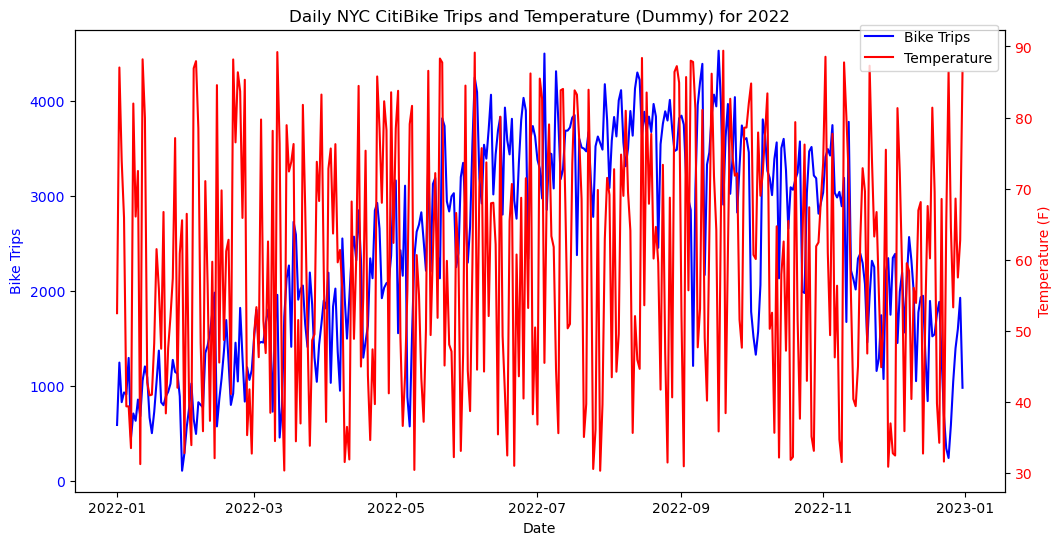

In [32]:
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot bike rides
ax1.plot(daily_df['date'], daily_df['bike_rides_daily'], color='blue', label='Bike Trips')
ax1.set_xlabel('Date')
ax1.set_ylabel('Bike Trips', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis for temperature
ax2 = ax1.twinx()
ax2.plot(daily_df['date'], daily_df['temperature'], color='red', label='Temperature')
ax2.set_ylabel('Temperature (F)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title
plt.title('Daily NYC CitiBike Trips and Temperature (Dummy) for 2022')

# Optional: add legend
fig.legend(loc='upper right', bbox_to_anchor=(0.9,0.9))

plt.show()


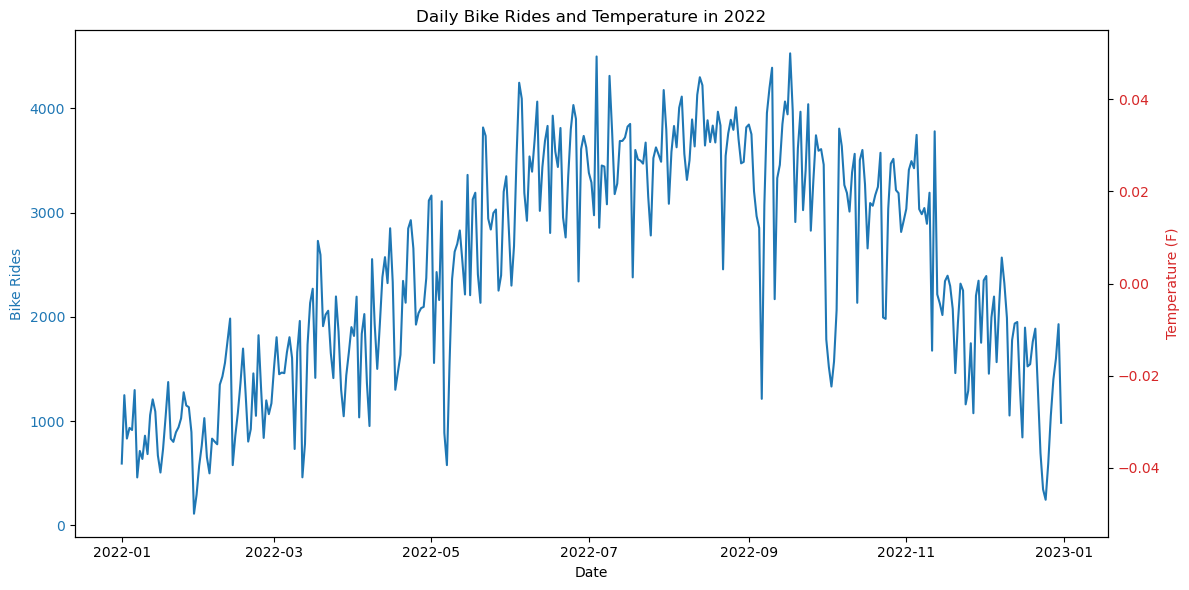

In [23]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Left y-axis: bike rides
ax1.set_xlabel('Date')
ax1.set_ylabel('Bike Rides', color='tab:blue')
ax1.plot(daily_df['date'], daily_df['bike_rides_daily'], color='tab:blue', label='Bike Rides')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Right y-axis: temperature
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature (F)', color='tab:red')
ax2.plot(daily_df['date'], daily_df['temperature'], color='tab:red', label='Temperature')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Daily Bike Rides and Temperature in 2022')
fig.tight_layout()
plt.show()

In this step, I used Matplotlib's object-oriented (OO) paradigm to create a dual-axis line plot. 
I first plotted bike trips on the primary y-axis (ax1) and then plotted temperature on a secondary y-axis (ax2) using ax1.twinx(). 
This allows visual comparison of two variables with different scales on the same x-axis. 
The OO approach was used for better control over axes, colors, labels, and layout.


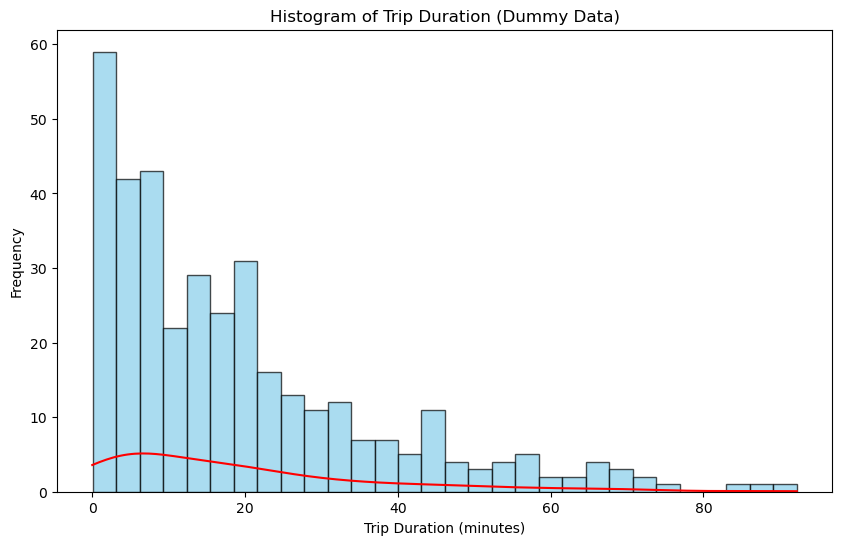

In [33]:
# Create dummy tripduration in minutes
np.random.seed(42)
daily_df['tripduration'] = np.random.exponential(scale=20, size=len(daily_df))  # skewed data

# Histogram
plt.figure(figsize=(10,6))
plt.hist(daily_df['tripduration'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Trip Duration (Dummy Data)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')

# Optional: add curve using density
from scipy.stats import gaussian_kde

density = gaussian_kde(daily_df['tripduration'])
x = np.linspace(0, daily_df['tripduration'].max(), 200)
plt.plot(x, density(x)*len(daily_df['tripduration'])*(x[1]-x[0]), color='red')  # scale density to histogram
plt.show()

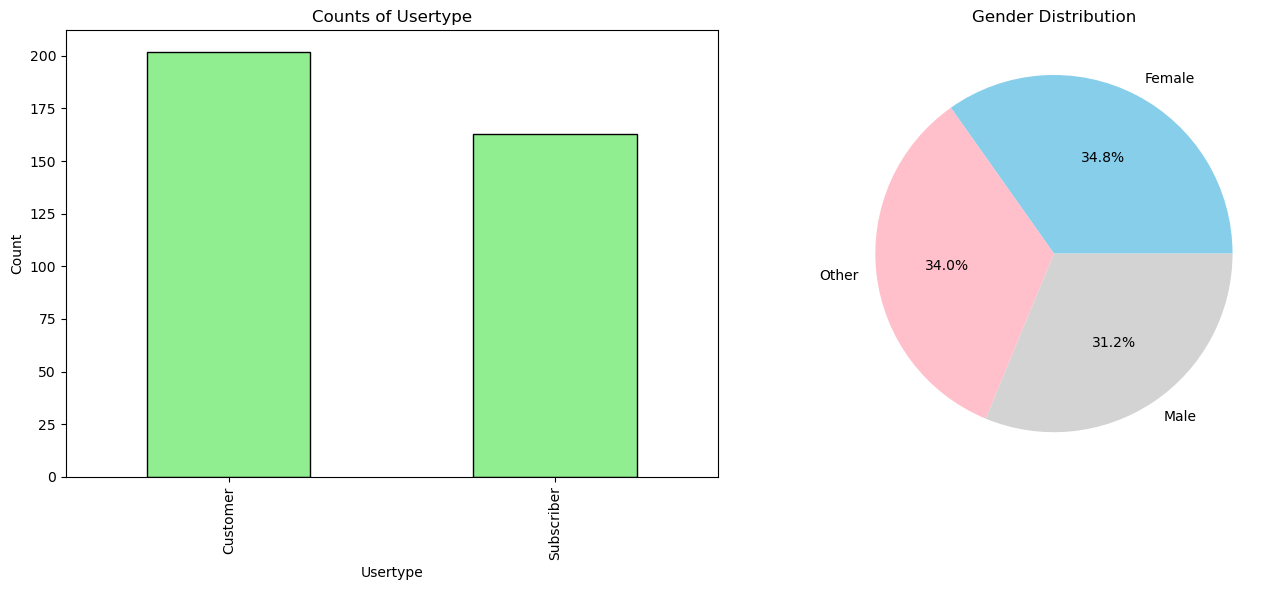

In [34]:
# Dummy usertype and gender
daily_df['usertype'] = np.random.choice(['Customer', 'Subscriber'], size=len(daily_df))
daily_df['gender'] = np.random.choice(['Male', 'Female', 'Other'], size=len(daily_df))

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

# Bar chart: usertype
daily_df['usertype'].value_counts().plot(kind='bar', ax=ax1, color='lightgreen', edgecolor='black')
ax1.set_title('Counts of Usertype')
ax1.set_xlabel('Usertype')
ax1.set_ylabel('Count')

# Pie chart: gender
daily_df['gender'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%', colors=['skyblue','pink','lightgrey'])
ax2.set_ylabel('')  # remove y-label
ax2.set_title('Gender Distribution')

plt.tight_layout()
plt.show()